# Towards an automated system for the analysis of paleogeoscientific time series

Deborah Khider<sup>1</sup>, Feng Zhu<sup>1</sup>, Nick Mckay<sup>2</sup>,Pratheek Athreya<sup>1</sup>, Myron Kwan<sup>1</sup>, Julien Emile-Geay<sup>1</sup>, Yolanda Gil<sup>1</sup>.

<sup>1</sup>University of Southern California
<sup>2</sup>Northern Arizona University

## <a name='abstract'>Abstract</a>

Paleoclimate observations are crucial to assessing current climate change in the context of past variations. In recent years, several efforts have resulted in the creation of standardized databases covering the past 2,000 and 12,000 years respectively (PAGES2k, Neukom et al., 2019; TEMP12k, Kaufmann et al., 2020).
The standardization of paleoclimate datasets through the use of a metadata-rich data format (LiPD, McKay and Emile-Geay, 2016) and a reporting standard (PaCTS, Khider et al., 2019) has facilitated the development of an automated system for the analysis of such datasets. This automated system (autoTS) relies on (1) expert-grade workflows that describes the steps a paleoclimatologist would follow to analyze their dataset, (2) a data profiler for automated data characterization, including the identification of missing values or longer-term trends in the data, which allows automatically selecting the proper pre-processing steps, and (3) catalogs of methods for data analysis ([Pyleoclim](https://github.com/LinkedEarth/Pyleoclim_util) and [GeoChronR](https://github.com/nickmckay/GeoChronR)).

In this notebook, we illustrate an application for this automated system by looking at the effect of age uncertainty on spectral analysis of selected records from the Indo-Pacific Warm Pool. First, we will query the LinkedEarth database [(Gil et al., 2017)](https://link.springer.com/chapter/10.1007/978-3-319-68204-4_24) for appropriate records, create age models using the OxCal package (Bronk Ramsey, 2009) as implemented within the GeoChronR package, and pre-process the resulting datasets for spectral analysis using Pyleoclim. The notebook format allows exploring the impact of various assumptions (choice of methods and parameters) on the overall results as well as making the study fully reproducible.

## <a name='objectives'>Objectives</a>
This notebook runs through the typical workflow of a paleoclimatologists who wants to test a hypothesis in the spectral domain, for instance: _is there evidence for climate variability at periodicities associated with solar cycles over a given region?_  Before the advent of EarthCube technologies and standards, this simple question could take weeks or months for a field- or lab-based geoscientist to answer, most often with sup-bar statistical techniques. Here we illustrate how EarthCube tools can "grease the wheels" of such an analysis, automating all the tedious tasks so scientists can focus on scientifically meaningful decisions. 

The first step is to find published records that meet certain criteria. In this case, one would want reconstructions of surface temperature (or variables closely related to that parameter) with sufficient temporal granularity to resolve the oscillations of interest. Then, one wants to quantify uncetainties in the timing of the reconstructed events using a Bayesian age modeling technique, which outputs an [ensemble](https://en.wikipedia.org/wiki/Statistical_ensemble_(mathematical_physics)) of possible paths. Finally, these paths are input into a spectral analysis technique, therefore producing ensemble-based estimates of the frequency content of the timeseries.
One can then apply various types of reasoning (automated or not) to test the hypothesis in question. Here we illustrate how EarthCube-related standards and tools (the [LinkedEarth](http://wiki.linked.earth) platform, the [LiPD](http://lipd.net) format, and the [Pyleoclim](https://github.com/LinkedEarth/Pyleoclim_util) and  [GeoChronR](https://github.com/nickmckay/GeoChronR) packages) may be leveraged to produce a concise end--to-end workflow that fits within a single Jupyter notebook. This workflow may be easily generalized or modified to fit other scientific goals.  



## Table of Contents
* [Abstract](#abstract)
* [Objectives](#objectives)
* [Query](#query)
* [Dealing with LiPD files](#lipd)
* [Age modeling](#age)
* [Spectral Analysis](#spectral)
* [References](#refs)

The Notebook makes use of the following software packages:
* Pyleoclim: [GitHub Release](https://github.com/LinkedEarth/Pyleoclim_util/releases/tag/0.5.beta)
* GeoChronR: [GitHub Link](https://github.com/nickmckay/GeoChronR/tree/improve-age-modeling-workflow)
* Lipd: `pip install lipd`
* rpy2: `pip install rpy2` to run R inside a Python Jupyter Notebook. (not available to Windows users at present)

In [1]:
import pyleoclim as pyleo
import lipd as lpd
import os
%load_ext rpy2.ipython

## <a name='query'> Query </a>
First, we will query the [LinkedEarth database](http://wiki.linked.earth) for marine sedimentary records recording sea surface temperature spanning the [Holocene](https://en.wikipedia.org/wiki/Holocene) epoch. The database has a [SPARQL](https://www.w3.org/TR/rdf-sparql-query/) endpoint, which is directly accesible through the Pyleoclim package.

In [2]:
# variables and parameters
archiveType=["marine sediment","Marine Sediment"]
proxyObsType=[ ]
infVarType=["Sea Surface Temperature"]
sensorGenus=[ ]
sensorSpecies=[ ]
interpName=["temperature","Temperature"]
interpDetail=["sea surface"]
ageUnits=["kyr BP"]
ageBound=[0,10]
ageBoundType=["any"]
recordLength=[4]
resolution=[ ]
lat=[-14,1.5]
lon=[110,135]
alt=[-10000,0]
#functions
res = pyleo.utils.queryLinkedEarth(archiveType=archiveType, proxyObsType=proxyObsType,
                             infVarType = infVarType, sensorGenus=sensorGenus,
                             sensorSpecies=sensorSpecies, interpName=interpName, 
                             interpDetail =interpDetail, ageUnits = ageUnits,
                             ageBound = ageBound, ageBoundType = ageBoundType,
                             recordLength = recordLength, resolution = resolution,
                             lat = lat, lon = lon, alt = alt, 
                             print_response = True, download_lipd = True,
                             download_folder = './lipd')
#outputs

http://wiki.linked.earth/Special:URIResolver/MD01-2D2378.Xu.2008
http://wiki.linked.earth/Special:URIResolver/GeoB10069-2D3.Gibbons.2014


In [3]:
# variables and parameters
archiveType=["marine sediment","Marine Sediment"]
proxyObsType=[ ]
infVarType=["Sea Surface Temperature"]
sensorGenus=[ ]
sensorSpecies=[ ]
interpName=["temperature","Temperature"]
interpDetail=["sea surface"]
ageUnits=["yr BP"]
ageBound=[0,10000]
ageBoundType=["any"]
recordLength=[4000]
resolution=[ ]
lat=[-14,1.5]
lon=[110,135]
alt=[-10000,0]
#functions
res = pyleo.utils.queryLinkedEarth(archiveType=archiveType, proxyObsType=proxyObsType,
                             infVarType = infVarType, sensorGenus=sensorGenus,
                             sensorSpecies=sensorSpecies, interpName=interpName, 
                             interpDetail =interpDetail, ageUnits = ageUnits,
                             ageBound = ageBound, ageBoundType = ageBoundType,
                             recordLength = recordLength, resolution = resolution,
                             lat = lat, lon = lon, alt = alt, 
                             print_response = True, download_lipd = True,
                             download_folder = './lipd')
#outputs

http://wiki.linked.earth/Special:URIResolver/MD98-2D2165.Levi.2007
http://wiki.linked.earth/Special:URIResolver/BJ8-2D03-2D70GGC.Linsley.2010
http://wiki.linked.earth/Special:URIResolver/BJ8-2D03-2D13GGC.Linsley.2010


The query returned and downloaded 5 LiPD files for further analysis.

## <a name='lipd'> Dealing with LiPD files </a>

The query returns a series of files in the [LiPD](http://lipd.net) (linked Paleo Data) format (McKay and Emile-Geay , 2016). The files can be manipulated using utilities in Matlab, R, or Python.

GeoChronR and Pyleoclim have been designed around the LiPD format and are capable of handling most data transformation automatically. In Pyleoclim, the LiPD library can be opened into a `Lipd` object, on which various methods can be implemented. An example of such method is `mapAllArchive`, which allows us to map the queried records according to the type of archive. 

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 5 LiPD file(s)
reading: BJ8-03-13GGC.Linsley.2010.lpd
reading: GeoB10069-3.Gibbons.2014.lpd
reading: MD98-2165.Levi.2007.lpd
reading: BJ8-03-70GGC.Linsley.2010.lpd
reading: MD01-2378.Xu.2008.lpd
Finished read: 5 records


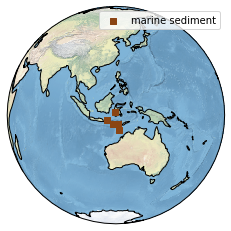

(<Figure size 432x288 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x1a29230e48>)

In [9]:
# variables and parameters
#functions
D = pyleo.Lipd(usr_path=os.getcwd())
D.mapAllArchive(projection='Orthographic', proj_default={'central_longitude':120, 'central_latitude':-5})
#outputs

## <a name='age'> Age modeling </a>

One of the defining characterstics of paleoclimate time series is their uncertainty in age, stemming from the fact that chronological age is often unknown for most archives and must be determined through dating techniques such as radiocarbon. In the past decade, there has been an explosion of Bayesian methods for age modeling. Most of these software were written in the R language and are available through GeoChronR. In particular, the popular [OxCal](https://c14.arch.ox.ac.uk/oxcalhelp/hlp_contents.html) program may now be accessed this way. 

Since LiPD files and associated keys are standardized, GeoChronR is capable of handling the data transformation necessary from LiPD to the input dataframe for OxCal. The resulting age ensembles are then extracted automtically from the OxCal ouputs and inserted as EnsembleTables into the LiPD files.

The next 5 cells use R magic to show how to apply OxCal to each of the 5 LiPD files. 

In [14]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")


# BJ8-03-70GGC.Linsley.2010 -----------------------------------------------
L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/BJ8-03-70GGC.Linsley.2010.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = 'id', age14CVar = 'age14c', age14CuncertaintyVar = 'age14cuncertainty', ageVar = 'calendarage', ageUncertaintyVar = 'calendarageuncertainty', depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL)


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)

#add in the row
cdf <- dplyr::bind_rows(sage,cdf)



oxMod <- createOxcalModel(cdf,
                          depthInterval = 10,
                          eventsPerUnitLength = .1,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T,maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: BJ8-03-70GGC.Linsley.2010.lpd"
Looking for laboratory ID 
[1] "Found it! Moving on..."
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for calibrated/calendar ages 
[1] "Found it! Moving on..."
Looking for 2-sigma calibrated age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected ages does not seem to exist, moving on.
[1] "Variable choices for reuse..."
For future reference: here are the options you chose:
 Find later with getLastVarString()
labIDVar = 'id', age14CVar = 'age14c', age14Cunc

In [16]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")

# BJ8-03-13GGC.Linsley.2010 -----------------------------------------------


L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/BJ8-03-13GGC.Linsley.2010.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = 'id', age14CVar = 'age14c', age14CuncertaintyVar = 'age14cuncertainty', ageVar = 'calendarage', ageUncertaintyVar = 'calendarageuncertainty', depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL)


#cdf <- createChronMeasInputDf(L)


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)
cdf <- dplyr::bind_rows(sage,cdf)

#                       ,labIDVar = 'labID', age14CVar = 'age', age14CuncertaintyVar = 'uncEstimate', ageVar = 'age', ageUncertaintyVar = NULL, depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL) 


#estimate

oxMod <- createOxcalModel(cdf,
                          depthInterval = 10,
                          eventsPerUnitLength = .1,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T, maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: BJ8-03-13GGC.Linsley.2010.lpd"
Looking for laboratory ID 
[1] "Found it! Moving on..."
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for calibrated/calendar ages 
[1] "Found it! Moving on..."
Looking for 2-sigma calibrated age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected ages does not seem to exist, moving on.
[1] "Variable choices for reuse..."
For future reference: here are the options you chose:
 Find later with getLastVarString()
labIDVar = 'id', age14CVar = 'age14c', age14Cunc

In [17]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")

# GeoB10069-3.Gibbons.2014 ------------------------------------------------
L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/GeoB10069-3.Gibbons.2014.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = NULL, age14CVar = 'age14c', age14CuncertaintyVar = 'age14c uncertainty', ageVar = NULL, ageUncertaintyVar = NULL, depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL)


#cdf <- createChronMeasInputDf(L)


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)
cdf <- dplyr::bind_rows(sage,cdf)

oxMod <- createOxcalModel(cdf,
                          depthInterval = .20,
                          eventsPerUnitLength = 10,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T, maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: GeoB10069-3.Gibbons.2014.lpd"
Looking for laboratory ID 
laboratory ID does not seem to exist, moving on.
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
converting radiocarbon ages from ka to yr BP 
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
converting 1-sigma radiocarbon age uncertainty (+/-) from ka to yr BP 
Looking for calibrated/calendar ages 
calibrated/calendar ages does not seem to exist, moving on.
Looking for 2-sigma calibrated age uncertainty (+/-) 
2-sigma calibrated age uncertainty (+/-) does not seem to exist, moving on.
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected 

In [18]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")

# MD01-2378.Xu.2008 ------------------------------------------------
L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/MD01-2378.Xu.2008.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = 'lab label', age14CVar = 'age14c', age14CuncertaintyVar = 'age14cuncertainty', ageVar = 'calage', ageUncertaintyVar = 'calageuncertainty', depthVar = 'depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL)


#cdf <- createChronMeasInputDf(L)


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)
cdf <- dplyr::bind_rows(sage,cdf)

oxMod <- createOxcalModel(cdf,
                          depthInterval = .10,
                          eventsPerUnitLength = 20,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T, maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: MD01-2378.Xu.2008.lpd"
Looking for laboratory ID 
[1] "Found it! Moving on..."
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for calibrated/calendar ages 
[1] "Found it! Moving on..."
Looking for 2-sigma calibrated age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected ages does not seem to exist, moving on.
[1] "Variable choices for reuse..."
For future reference: here are the options you chose:
 Find later with getLastVarString()
labIDVar = 'lab label', age14CVar = 'age14c', age14Cunce

In [19]:
%%R

library(lipdR) #devtools::install_github("nickmckay/lipd-utilities",subdir - "R")
library(oxcAAR)
library(geoChronR) #devtools::install_github("nickmckay/geoChronR",ref = "improve-age-modeling-workflow")

library(dplyr)
oxcAAR::setOxcalExecutablePath("/Users/deborahkhider/OxCal/bin/OxCalMac")

# MD98-2165.Levi.2007 ------------------------------------------------
L <- readLipd("/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/MD98-2165.Levi.2007.lpd")

cdf <- createChronMeasInputDf(L,labIDVar = 'sample code', age14CVar = 'age14c', age14CuncertaintyVar = 'age14cuncertainty', ageVar = 'cal. age', ageUncertaintyVar = 'cal. age uncertainty', depthVar = 'corrected depth', reservoirAge14CVar = NULL, reservoirAge14CUncertaintyVar = NULL, rejectedAgesVar = NULL) 


#assign in reservoir ages?
cdf$reservoirAge <- 70
cdf$reservoirAgeUnc <- 50

#remove outlier
cdf <- cdf[-1,]

#add surface age estimate?
sage <- data.frame(labID = "surface",
                   age = 0,
                   ageUnc = 25,
                   depth = 0)
cdf <- dplyr::bind_rows(sage,cdf)


oxMod <- createOxcalModel(cdf,
                          depthInterval = 20,
                          eventsPerUnitLength = .010,
                          eventsPerUnitLengthUncertainty = 0,
                          outlierProb = .05,
                          calCurve = "marine")

oxcalResultFilePath <- oxcAAR::executeOxcalScript(oxMod$modelText)

L <- loadOxcalOutput(L,oxcalResultFilePath,oxMod,modelNum = 1,makeNew = T,maxEns=200)
plotChronEns(L)
writeLipd(L,"/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels")

[1] "reading: MD98-2165.Levi.2007.lpd"
Looking for laboratory ID 
[1] "Found it! Moving on..."
Looking for radiocarbon ages 
[1] "Found it! Moving on..."
Looking for 1-sigma radiocarbon age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for calibrated/calendar ages 
[1] "Found it! Moving on..."
Looking for 2-sigma calibrated age uncertainty (+/-) 
[1] "Found it! Moving on..."
Looking for depth or position 
[1] "Found it! Moving on..."
Looking for radiocarbon reservoir age offsets (deltaR) 
radiocarbon reservoir age offsets (deltaR) does not seem to exist, moving on.
Looking for radiocarbon reservoir age offsets (deltaR) uncertainties 
radiocarbon reservoir age offsets (deltaR) uncertainties does not seem to exist, moving on.
Looking for rejected ages 
rejected ages does not seem to exist, moving on.
[1] "Variable choices for reuse..."
For future reference: here are the options you chose:
 Find later with getLastVarString()
labIDVar = 'sample code', age14CVar = 'age14c', age14C

## <a name='spectral'>Spectral Analysis</a>

We now perform time-uncertain spectral analysis on these records. The LiPD files containing the age model ensembles are loaded into a second LiPD object into Pyleoclim. Each LiPD file most often contains several time series, which can be extracted into a flattened dictionary for easy manipulation. 

In [2]:
D2=pyleo.Lipd(usr_path='/Users/deborahkhider/Documents/GitHub/LiPDbooks/notebooks/lipd/agemodels')
ts_list = D2.to_tso()

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 5 LiPD file(s)
reading: BJ8-03-13GGC.Linsley.2010.lpd
reading: GeoB10069-3.Gibbons.2014.lpd
reading: MD98-2165.Levi.2007.lpd
reading: BJ8-03-70GGC.Linsley.2010.lpd
reading: MD01-2378.Xu.2008.lpd
Finished read: 5 records
extracting paleoData...
extracting: BJ8-03-13GGC.Linsley.2010
extracting: GeoB10069-3.Gibbons.2014
extracting: MD98-2165.Levi.2007
extract: Exception: can only concatenate list (not "str") to list
extracting: BJ8-03-70GGC.Linsley.2010
extracting: MD01-2378.Xu.2008
extract: Exception: can only concatenate list (not "str") to list
Created time series: 21 entries


Here, we only consider the time series dealing with sea surface temperature. In addition, we want to know how the temperature was inferred (which proxy).

In [3]:
ts_sst=[]
for item in ts_list:
    if 'paleoData_inferredVariableType' in item.keys():
        if item['paleoData_inferredVariableType'] == 'Sea Surface Temperature':
            ts_sst.append(item)
         
for item in ts_sst:
    if 'paleoData_inferredFrom_variableName' in item.keys():
        proxy=item['paleoData_inferredFrom_variableName']
    else:
        proxy='N/A'
    print(item['dataSetName']+': '+proxy)

BJ8-03-13GGC.Linsley.2010: mg/ca
BJ8-03-13GGC.Linsley.2010: N/A
GeoB10069-3.Gibbons.2014: mg/ca
BJ8-03-70GGC.Linsley.2010: mg/ca
BJ8-03-70GGC.Linsley.2010: sst


For our purpose, we will only consider the series inferred from the Mg/Ca proxy. Each series is loaded into a `LipdSeries` object from which the EnsembleTable obtained from GeoChronR can be extracted. These EnsembleTables become MultipleSeries (multiple Series) objects on which pre-processing and spectral analysis can be applied.

For spectral analysis, we use the Weighted Wavelet Z Transform method (Foster, 1996, Kirchner & Neal, 2013), which is suitable for unevenly spaced time series. The series are first standardized and detrended prior to applying this algorithm.  

In [4]:
#BJ8-03-13GGC.Linsley.2010
ts=pyleo.LipdSeries(ts_sst[0])
#extract age information
ms_ens = ts.chronEnsembleToPaleo(D2)
#Standardize
ms_ens_std=ms_ens.standardize()
#detrend
ms_ens_detrend=ms_ens_std.detrend()
#Spectral analysis
psds_ens=ms_ens_detrend.spectral()

Performing spectral analysis on surrogates: 100%|██████████| 199/199 [14:21<00:00,  4.36s/it]


Pyleoclim also contains code for visualization of spectral analysis, among others.

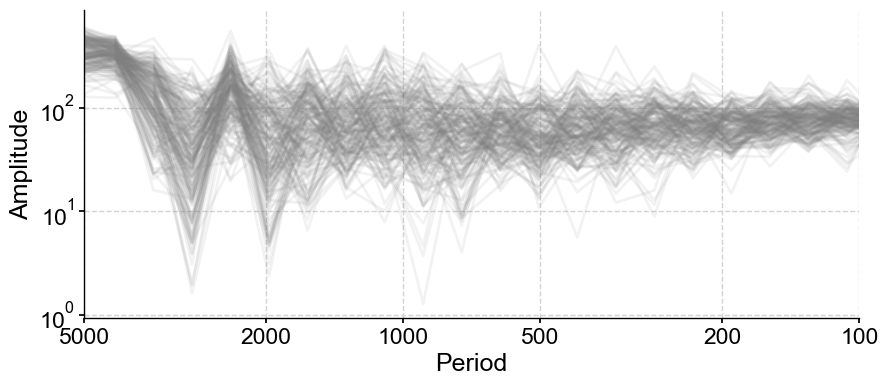

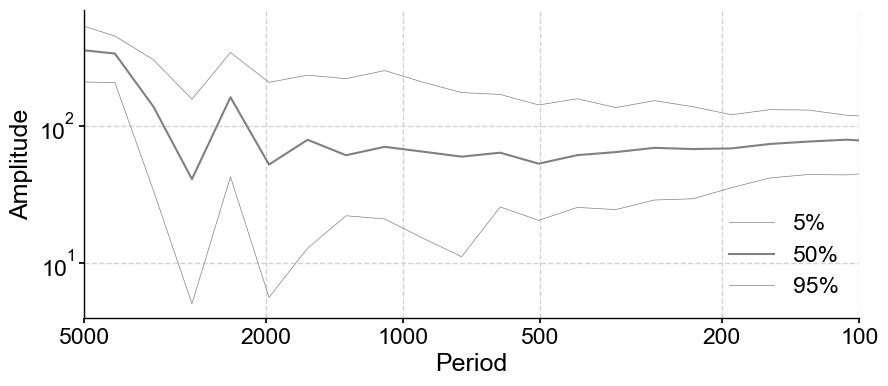

(<Figure size 1000x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a4066cc50>)

In [5]:
#Plot
psds_ens.plot(plot_kwargs={'color':'gray', 'alpha':0.1})
ens_qs=psds_ens.quantiles()
ens_qs.plot()

In [6]:
#GeoB10069-3.Gibbons.2014
ts2=pyleo.LipdSeries(ts_sst[2])
#extract age information
ms_ens2 = ts2.chronEnsembleToPaleo(D2)
#Standardize
ms_ens_std2=ms_ens2.standardize()
#detrend
ms_ens_detrend2=ms_ens_std2.detrend()
#Spectral analysis
psds_ens2=ms_ens_detrend2.spectral()

Performing spectral analysis on surrogates: 100%|██████████| 199/199 [1:12:30<00:00,  4.27s/it]     


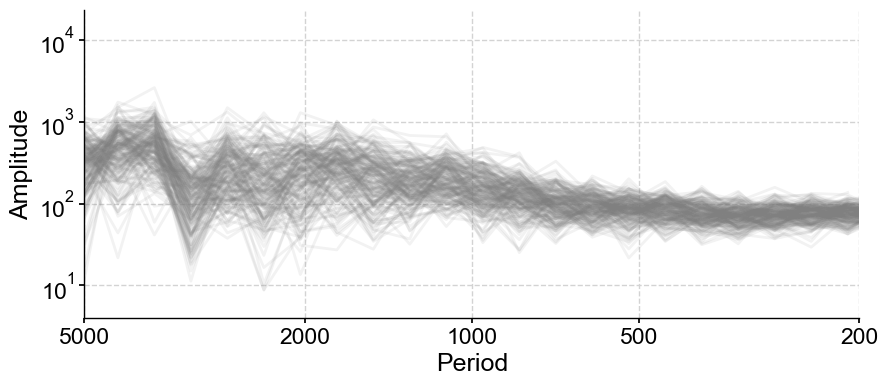

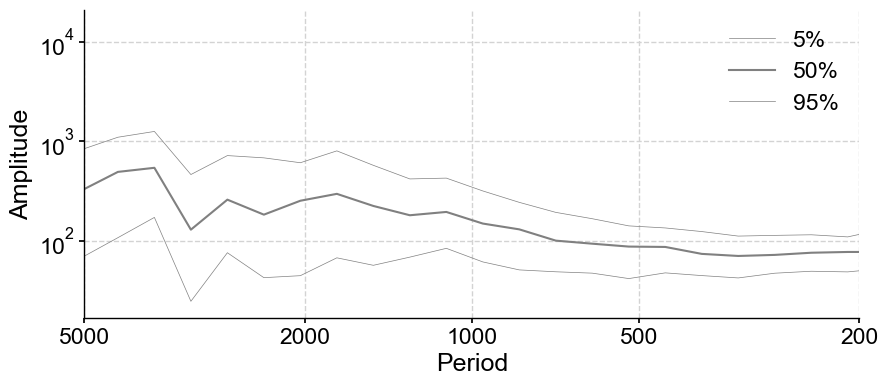

(<Figure size 1000x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a4e62dac8>)

In [7]:
#Plot
psds_ens2.plot(plot_kwargs={'color':'gray', 'alpha':0.1})
ens_qs2=psds_ens2.quantiles()
ens_qs2.plot()

In [8]:
#BJ8-03-70GGC.Linsley.2010
ts3=pyleo.LipdSeries(ts_sst[3])
#extract age information
ms_ens3 = ts3.chronEnsembleToPaleo(D2)
#Standardize
ms_ens_std3=ms_ens3.standardize()
#detrend
ms_ens_detrend3=ms_ens_std3.detrend()
#Spectral analysis
psds_ens3=ms_ens_detrend3.spectral()

Performing spectral analysis on surrogates: 100%|██████████| 199/199 [14:27<00:00,  4.69s/it]


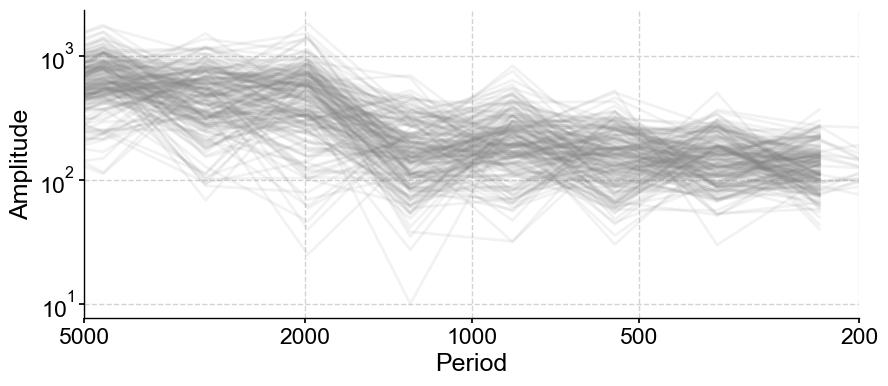

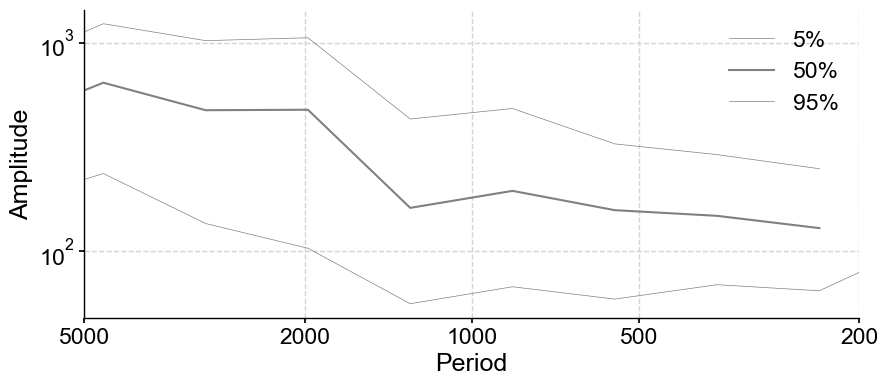

(<Figure size 1000x400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a52515710>)

In [9]:
#Plot
psds_ens3.plot(plot_kwargs={'color':'gray', 'alpha':0.1})
ens_qs3=psds_ens3.quantiles()
ens_qs3.plot()


From these results, it is evident that some records show evidence of solar-like frequencies, however the spectra are different enough that one would need to formally asses coherence to establish that it is a regional effect, not a purely local artifact (which would weaken the case for a solar driver). Though few reliable inferences can be made from this exploratory analysis, it illustrates how the initital steps of such an investigation have been facilitated by EarthCube tools.


## <a name='refs'> References </a>

* Bronk Ramsey, C. (2009). Bayesian analysis of radiocarbon dates. Radiocarbon, 51(1), 337-360. 
* Foster, G. (1996). Wavelets for period analysis of unevenly sampled time series. The Astronomical Journal, 112(4), 1709-1729. 
* Gibbons, F. T., Oppo, D. W., Mohtadi, M., Rosenthal, Y., Cheng, J., Liu, Z., & Linsley, B. K. (2014). Deglacial δ18O and hydrologic variability in the tropical Pacific and Indian Oceans. Earth and Planetary Science Letters, 387, 240-251. doi:10.1016/j.epsl.2013.11.032
* Linsley, B. K., Rosenthal, Y., & Oppo, D. W. (2010). Holocene evolution of the Indonesian throughflow and the western Pacific warm pool. Nature geoscience, 3, 578-583. doi:doi:10.1038/ngeo920
* Gil, Y., Garijo, D., Ratnakar, V., Khider, D., Emile-Geay, J., & McKay, N. P. (2017). A Controlled Crowdsourcing Approach for Practical Ontology Extensions and Metadata Annotations. In C. e. a. d'Amato (Ed.), The Semantic Web - ISWC 2017. ISWC 2107. Lecture Notes in Computer Science (Vol. 10588, pp. 231-246): Springer, Cham.
* Kaufman, D., McKay, N., Routson, C., Erb, M., Davis, B., Heiri, O., . . . Zhilich, S. (2020). A global database of Holocene paleotemperature records. Sci Data, 7(1), 115. doi:10.1038/s41597-020-0445-3
* Khider, D., Emile‐Geay, J., McKay, N. P., Gil, Y., Garijo, D., Ratnakar, V., . . . Zhou, Y. (2019). PaCTS 1.0: A Crowdsourced Reporting Standard for Paleoclimate Data. Paleoceanography and Paleoclimatology, 34(10), 1570-1596. doi:10.1029/2019pa003632
* Kirchner, J. W., and C. Neal (2013), Universal fractal scaling in stream chemistry and its implications for solute transport and water quality trend detection, Proceedings of the National Academy of Sciences, 110(30), 12,213–12,218, doi:10.1073/pnas.1304328110.
* Neukom, R., Barboza, L. A., Erb, M. P., Shi, F., Emile-Geay, J., Evans, M. N., . . . von Gunten, L. (2019). Consistent multi-decadal variability in global temperature reconstructions and simulations over the Common Era. Nat Geosci, 12(8), 643-649. doi:10.1038/s41561-019-0400-0
* McKay, N. P., & Emile-Geay, J. (2016). Technical Note: The Linked Paleo Data framework – a common tongue for paleoclimatology. Climate of the Past, 12, 1093-1100. doi:10.5194/cp-12-1093-2016